### Step 1: Data Loading and Preprocessing

We start by loading the Iris dataset.

- Loading it directly from `sklearn.datasets`

After loading:
- We split the dataset into **70% training** and **30% testing** using `train_test_split`.
- Standardize the features using `StandardScaler` to normalize the input space for better model performance.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Spliting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Step 2: Model Training Without Dimensionality Reduction

In this step, we train and evaluate the following models on the **original standardized dataset**:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

We use `classification_report` and `confusion_matrix` to evaluate performance across:
- Accuracy
- Precision
- Recall
- F1-Score

These results serve as the **baseline** to compare against PCA and LDA-based models later.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate
results_no_dr = {}

for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    results_no_dr[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} - Without Dimensionality Reduction")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression - Without Dimensionality Reduction
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Decision Tree - Without Dimensionality Reduction
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]

Random Forest - Wit

### 📉 Step 3: Dimensionality Reduction with PCA

Now, we apply **Principal Component Analysis (PCA)** to reduce feature dimensionality from 4D to 2D.

PCA is an **unsupervised** technique that projects the data to a lower-dimensional space while preserving the **maximum variance**.

After transformation:
- We train the same 4 models on the PCA-reduced training set.
- Evaluate them using the same metrics.

This helps us observe how unsupervised dimensionality reduction affects classification performance.


In [3]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Training and evaluating on PCA-transformed data
results_pca = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    results_pca[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} - With PCA")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression - With PCA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Decision Tree - With PCA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Random Forest - With PCA
              precision    recall  f1-scor

### Step 4: Dimensionality Reduction with LDA

Here, we use **Linear Discriminant Analysis (LDA)** to reduce feature dimensionality to 2D.

Unlike PCA, LDA is a **supervised** technique that aims to maximize **class separability**.

- LDA finds axes that best distinguish between classes.
- We apply LDA to training data and transform both training and test sets.
- Then, train the same models and evaluate their performance.

This step helps us see how supervised dimensionality reduction impacts the models.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Applying LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Training and evaluating on LDA-transformed data
results_lda = {}

for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    results_lda[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} - With LDA")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression - With LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Decision Tree - With LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Random Forest - With LDA
              precision    recall  f1-scor

### Step 5: Performance Comparison and Analysis

Now we can compare the average **F1 scores** of each model across:

- No Dimensionality Reduction
- PCA
- LDA

Using a bar chart, we can visualize and analyze:
- How each model performs under dimensionality reduction.
- Whether PCA or LDA boosts or hurts classification performance.
- Which method is better suited for each type of classifier.

Typically:
- PCA may slightly reduce performance as it doesn't use label information.
- LDA often improves performance due to better class separation.

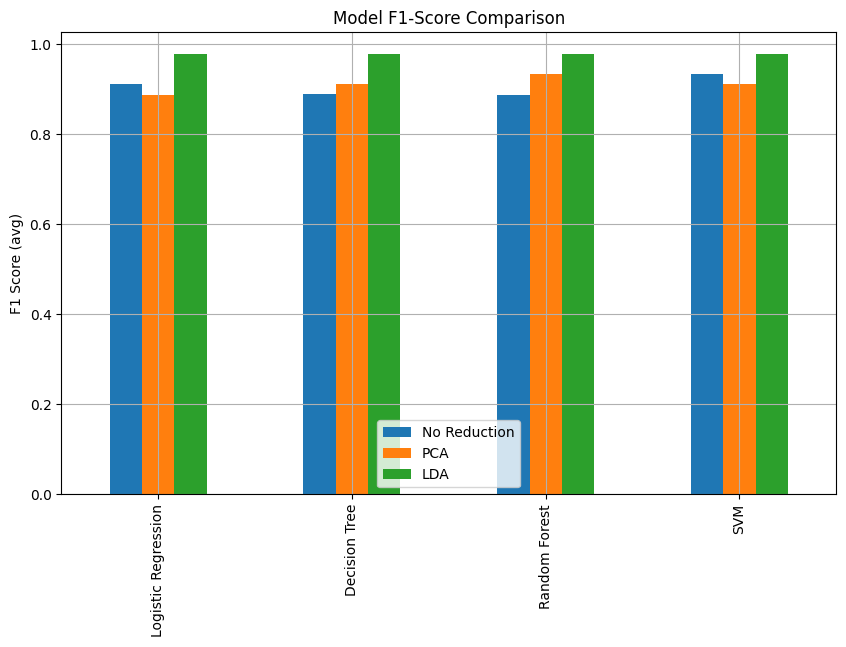

In [5]:
def extract_scores(results, metric="f1-score"):
    return {model: sum([v[metric] for k, v in scores.items() if k in ['0', '1', '2']]) / 3
            for model, scores in results.items()}

import matplotlib.pyplot as plt

f1_no_dr = extract_scores(results_no_dr)
f1_pca = extract_scores(results_pca)
f1_lda = extract_scores(results_lda)

df_compare = pd.DataFrame({
    "No Reduction": f1_no_dr,
    "PCA": f1_pca,
    "LDA": f1_lda
})

df_compare.plot(kind='bar', figsize=(10, 6), title='Model F1-Score Comparison')
plt.ylabel("F1 Score (avg)")
plt.grid(True)
plt.show()


### Visualizing PCA and LDA Projections

To better understand how PCA and LDA work:

- I created 2D scatter plots of the **training data** after transformation.
- Points are colored by class labels.

This can give an intuition:
- How well PCA and LDA separate the classes visually.
- Why LDA often performs better for classification tasks, as it aims to separate classes directly.

Text(0.5, 1.0, 'LDA Projection')

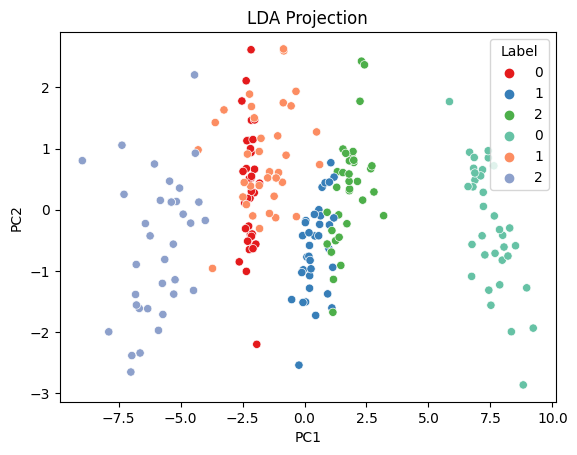

In [6]:
import seaborn as sns
import numpy as np

# PCA
pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y_train
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set1").set_title("PCA Projection")

# LDA
lda_df = pd.DataFrame(X_train_lda, columns=["LD1", "LD2"])
lda_df["Label"] = y_train
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Label", palette="Set2").set_title("LDA Projection")